## 실습 문제: 두 점 사이의 거리 계산
**설명**: 좌표 평면 위의 두 점 사이의 거리를 계산하는 것은 데이터 분석과 머신러닝에서 가장 기초적인 연산 중 하나입니다. 유클리드 거리는 두 점을 잇는 가장 짧은 직선거리를 의미하며, 피타고라스의 정리를 통해 계산할 수 있습니다. 이 실습에서는 NumPy 배열로 표현된 두 점의 좌표를 받아, 두 점 사이의 유클리드 거리를 계산하는 함수를 구현합니다.

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

**요구사항**:
- `calculate_distance` 함수를 완성하여, 두 개의 NumPy 배열 `p1`과 `p2`로 주어진 점 사이의 거리를 계산하세요.
- `p1`은 첫 번째 점의 (x, y) 좌표를, `p2`는 두 번째 점의 (x, y) 좌표를 담고 있습니다.
- NumPy의 기본 수학 함수(`np.subtract`, `np.square`, `np.sum`, `np.sqrt`)를 사용하여 단계별로 계산을 수행하세요.
- 계산된 스칼라(float) 거리 값을 반환합니다.



In [3]:
import numpy as np

def calculate_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    두 개의 NumPy 배열로 주어진 두 점 p1과 p2 사이의 유클리드 거리를 계산합니다.

    Args:
        p1 (np.ndarray): 첫 번째 점의 (x, y) 좌표.
        p2 (np.ndarray): 두 번째 점의 (x, y) 좌표.

    Returns:
        float: 두 점 사이의 유클리드 거리.
    """

    distance = np.sqrt(np.sum(np.square(np.subtract(p1, p2))))

    return distance


In [4]:
# 예제 사용법
point1 = np.array([1, 2])
point2 = np.array([4, 6])

distance = calculate_distance(point1, point2)
print(f"두 점 {point1}와 {point2} 사이의 거리는: {distance}")

두 점 [1 2]와 [4 6] 사이의 거리는: 5.0


## 실습 문제: 데이터셋의 쌍대 거리(Pairwise Distance) 계산

**설명**: 데이터 분석이나 군집화(Clustering) 알고리즘을 구현할 때, 서로 다른 두 그룹 간의 거리가 아니라 하나의 데이터셋 $X$ 내부에 있는 모든 데이터 포인트들끼리의 거리를 계산해야 하는 경우가 많습니다. 이를 쌍대 거리(Pairwise Distance)라고 합니다. $N$개의 샘플과 $D$개의 특성(feature)을 가진 행렬 $X$가 주어졌을 때, 모든 $i, j$ 쌍에 대한 유클리드 거리를 계산하여 $(N, N)$ 크기의 거리 행렬을 만드는 함수를 작성해 봅니다.

$$D_{ij} = \|x_i - x_j\|_2 = \sqrt{\sum_{k=1}^{D} (x_{ik} - x_{jk})^2}$$

**요구사항**:

  - 입력으로 $N \times D$ 차원의 NumPy 배열 $X$를 받습니다.
  - 브로드캐스팅(Broadcasting) 또는 적절한 NumPy 연산을 사용하여 모든 데이터 포인트 쌍 간의 유클리드 거리를 계산합니다.
  - 계산된 거리를 담은 $N \times N$ 크기의 대칭 행렬을 반환합니다.
  - 임의의 데이터를 생성하여 함수를 실행하고, 결과 행렬의 형태(shape)가 $(N, N)$인지 확인합니다.



In [12]:
import numpy as np

def pairwise_distance(X: np.ndarray) -> np.ndarray:
    """
    단일 데이터셋 X 내부의 모든 데이터 포인트 쌍 간의 유클리드 거리를 계산합니다.

    Parameters:
        X (np.ndarray): (N, D) 크기의 데이터 행렬. N은 샘플 수, D는 특성 수.

    Returns:
        np.ndarray: (N, N) 크기의 거리 행렬. (i, j) 요소는 X[i]와 X[j] 사이의 거리.
    """
    N = X.shape[0]
    dist = np.zeros((N, N))
    # for i in range(N) :
    #     for j in range(N) :
    #         dist[i][j] = calculate_distance(X[i], X[j])

    dist = np.sqrt(np.sum(np.square(X[:, np.newaxis, :] - X[np.newaxis, :, :]), axis=-1))

    return dist

    pass


In [13]:
# 실행 예제
# 4개의 샘플, 3개의 특성을 가진 임의의 데이터 생성
data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0]
])

# 쌍대 거리 계산
distance_matrix = pairwise_distance(data)

print(f"입력 데이터 형태: {data.shape}")
print(f"결과 거리 행렬 형태: {distance_matrix.shape}")
print("거리 행렬:\n", distance_matrix)

입력 데이터 형태: (4, 3)
결과 거리 행렬 형태: (4, 4)
거리 행렬:
 [[0.         1.41421356 1.41421356 1.        ]
 [1.41421356 0.         1.41421356 1.        ]
 [1.41421356 1.41421356 0.         1.73205081]
 [1.         1.         1.73205081 0.        ]]


## 실습 문제: 거리 행렬을 이용한 최근접 이웃 $k$개 인덱스 찾기

**설명**: 이전 단계에서 우리는 단일 데이터셋 내부의 모든 점들 간의 거리를 계산하여 \*\*거리 행렬(Distance Matrix)\*\*을 구하는 방법을 익혔습니다. $k$-최근접 이웃($k$-NN) 알고리즘의 핵심은 이 거리 정보를 바탕으로, 각 데이터 포인트와 가장 가까운 $k$개의 다른 데이터를 찾아내는 것입니다. 이를 위해 거리 값 자체가 아니라, 가장 가까운 데이터의 \*\*위치(인덱스)\*\*가 필요합니다. NumPy의 `np.argsort` 함수를 사용하면 배열을 크기 순으로 정렬했을 때의 인덱스를 효율적으로 반환받을 수 있습니다.

**요구사항**:

  - `find_k_nearest_indices` 함수를 작성합니다. 이 함수는 사전 계산된 거리 행렬 `dists`와 정수 `k`를 입력받습니다.
  - `np.argsort` 함수를 사용하여 `dists` 행렬의 각 행(각 데이터 포인트)을 기준으로 거리가 작은 순서대로 인덱스를 정렬합니다. 이때 행 단위 연산을 위해 `axis=1`을 설정해야 합니다.
  - 정렬된 인덱스 행렬에서 슬라이싱을 사용하여, 각 행의 가장 앞쪽(가장 가까운) $k$개의 인덱스만 추출합니다.
  - 최종적으로 $(N, k)$ 형태의 정수형 배열을 반환합니다. (여기서 $N$은 데이터 포인트의 수)

In [11]:
t = np.array([0,10,5])
skrr = np.argsort(t)
print(skrr)

[0 2 1]


In [14]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

def find_k_nearest_indices(dists: np.ndarray, k: int) -> np.ndarray:
    """
    주어진 거리 행렬(dists)에서 각 테스트 데이터(행)에 대해
    가장 가까운 k개의 훈련 데이터(열)의 인덱스를 찾습니다.

    Args:
        dists (np.ndarray): 거리 행렬 (N_test, N_train).
        k (int): 찾고자 하는 최근접 이웃의 수.

    Returns:
        np.ndarray: 각 테스트 데이터별 k개의 최근접 이웃 인덱스 (N_test, k).
    """

    sorted_dists = np.argsort(dists, axis=1)

    k_nearest_indices = sorted_dists[:, :k]

    return k_nearest_indices


In [23]:
A = np.array(
[
    [1,2,3],
    [4,5,6]
]
)

B = np.array(
[
    [0,0,0],
    [1,1,1],
    [2,2,2]
]
)

# A_sqsum = np.c_[np.sum(A**2,axis=1)]
# B_sqsum = np.sum(B**2,axis=1)
# print(A_sqsum + B_sqsum)

# AB = np.dot(A, B.T)
# print(AB)

# print(A_sqsum + B_sqsum - 2*AB)
print(A**2 + B**2)

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

1. Pairwise 거리 행렬 계산 중...
2. 최근접 이웃 인덱스 검색 중...

--- 결과 확인 ---
샘플 데이터 수: 10
거리 행렬 shape: (10, 10)
k-NN 인덱스 shape: (10, 3)

[샘플 0]의 가장 가까운 이웃 3개 인덱스:
인덱스: [0 4 7]
거리값: [0.         0.26013882 0.2662756 ]


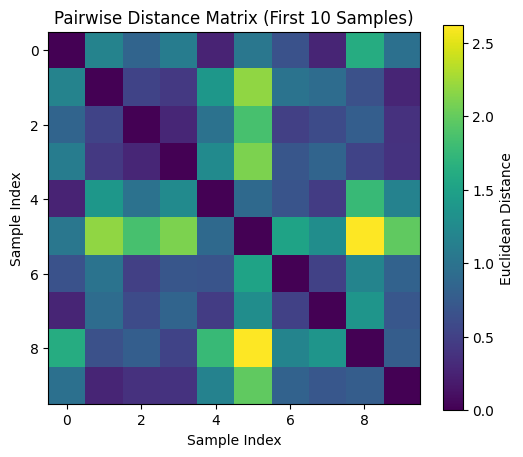

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# --- 실행 및 테스트 ---

# 1. 데이터 로드 및 준비
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시각화 및 확인을 위해 전체 데이터 중 앞쪽 10개만 샘플로 사용
X_sample = X_scaled[:10]

# k 설정 (자기 자신 포함 3개)
k = 3

# 2. 거리 행렬 계산 (인자를 하나만 넣어야 합니다!)
print("1. Pairwise 거리 행렬 계산 중...")
dists = pairwise_distance(X_sample)

# 3. K-NN 인덱스 찾기
print("2. 최근접 이웃 인덱스 검색 중...")
k_indices = find_k_nearest_indices(dists, k)

# 4. 결과 확인
print("\n--- 결과 확인 ---")
print(f"샘플 데이터 수: {X_sample.shape[0]}")
print(f"거리 행렬 shape: {dists.shape}") # (10, 10) 이어야 함
print(f"k-NN 인덱스 shape: {k_indices.shape}") # (10, 3) 이어야 함

print(f"\n[샘플 0]의 가장 가까운 이웃 {k}개 인덱스:")
print(f"인덱스: {k_indices[0]}")
print(f"거리값: {dists[0, k_indices[0]]}")
# 첫 번째는 0 (자기 자신), 거리는 0.0이어야 함

# (선택 사항) 거리 행렬 시각화
plt.figure(figsize=(6, 5))
plt.imshow(dists, cmap='viridis', origin='upper')
plt.colorbar(label='Euclidean Distance')
plt.title('Pairwise Distance Matrix (First 10 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()

In [10]:
import numpy as np

arr = np.array([[1,1,2,3], [2,2,3,0]])
res = np.array([np.bincount(ar) for ar in arr])[:, :2]
print(res)
res = np.argmax(res, axis=1)
print(res)

[[0 2]
 [1 0]]
[1 0]
